In [1]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import golden

In [2]:
acquisti = pd.read_csv('Acquisti o Ordini.csv', sep=',')

In [3]:
dataframe = acquisti[((acquisti['Tipo dato'] == "negli ultimi 3 mesi") | (acquisti['Tipo dato'] == "da 3 mesi a 1 anno fa")) & (acquisti['Sesso'] == "totale") & (acquisti['Classe di età'] != "14 anni e più")]
dataframe = dataframe.drop(columns=["Sesso","TIPO_DATO_SDS_ICT", "SEXISTAT1", "ETA1", "Flag Codes", "TIME","Flags"], inplace=False)
dataframe

,Tipo dato,Classe di età,Seleziona periodo,Value
128,negli ultimi 3 mesi,20-24 anni,2005,9.9
129,negli ultimi 3 mesi,20-24 anni,2006,15.8
130,negli ultimi 3 mesi,20-24 anni,2007,17.3
131,negli ultimi 3 mesi,20-24 anni,2008,13.4
132,negli ultimi 3 mesi,20-24 anni,2009,15.2
...,...,...,...,...
1883,da 3 mesi a 1 anno fa,18-19 anni,2016,12.3
1884,da 3 mesi a 1 anno fa,18-19 anni,2017,15.1
1885,da 3 mesi a 1 anno fa,18-19 anni,2018,15.2
1886,da 3 mesi a 1 anno fa,18-19 anni,2019,17.2


In [4]:
#Giovani
dataframe_primafascia = dataframe[((dataframe['Classe di età'] == "14-17 anni") | (dataframe['Classe di età'] == "20-24 anni") | (dataframe['Classe di età'] == "18-19 anni"))]
dataframe_primafascia = dataframe_primafascia.groupby(["Classe di età", "Seleziona periodo"]).sum()
dataframe_primafascia = dataframe_primafascia.groupby(["Seleziona periodo"]).mean()
dataframe_primafascia

C:\Users\gabri\AppData\Local\Temp\ipykernel_17248\412438213.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_primafascia = dataframe_primafascia.groupby(["Classe di età", "Seleziona periodo"]).sum()


,Value
Seleziona periodo,
2005,10.200000
2006,16.466667
2007,18.533333
2008,17.366667
2009,17.466667
2010,18.166667
2011,18.366667
2012,22.366667
2013,26.200000


In [5]:
#Medi
dataframe_secondafascia = dataframe[(dataframe['Classe di età'] == "25-34 anni") | (dataframe['Classe di età'] == "35-44 anni") | (dataframe['Classe di età'] == "45-54 anni") | (dataframe['Classe di età'] == "55-59 anni")]
dataframe_secondafascia = dataframe_secondafascia.groupby(["Classe di età", "Seleziona periodo"]).sum()
dataframe_secondafascia = dataframe_secondafascia.groupby(["Seleziona periodo"]).mean()
dataframe_secondafascia

C:\Users\gabri\AppData\Local\Temp\ipykernel_17248\4187871941.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_secondafascia = dataframe_secondafascia.groupby(["Classe di età", "Seleziona periodo"]).sum()


,Value
Seleziona periodo,
2005,16.825
2006,22.300
2007,23.200
2008,24.375
2009,25.225
2010,28.250
2011,27.900
2012,29.625
2013,33.050


In [6]:
#Anziani
dataframe_terzafascia = dataframe[(dataframe['Classe di età'] == "60-64 anni") | (dataframe['Classe di età'] == "65-74 anni") | (dataframe['Classe di età'] == "75 anni e più")]
dataframe_terzafascia = dataframe_terzafascia.groupby(["Classe di età", "Seleziona periodo"]).sum()
dataframe_terzafascia = dataframe_terzafascia.groupby(["Seleziona periodo"]).mean()
dataframe_terzafascia

C:\Users\gabri\AppData\Local\Temp\ipykernel_17248\1518979462.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_terzafascia = dataframe_terzafascia.groupby(["Classe di età", "Seleziona periodo"]).sum()


,Value
Seleziona periodo,
2005,9.566667
2006,11.666667
2007,12.600000
2008,14.333333
2009,19.600000
2010,18.033333
2011,16.866667
2012,20.733333
2013,20.400000


In [7]:
#Anni
anni = dataframe["Seleziona periodo"].values.tolist()
anni = anni[:16]
anni

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

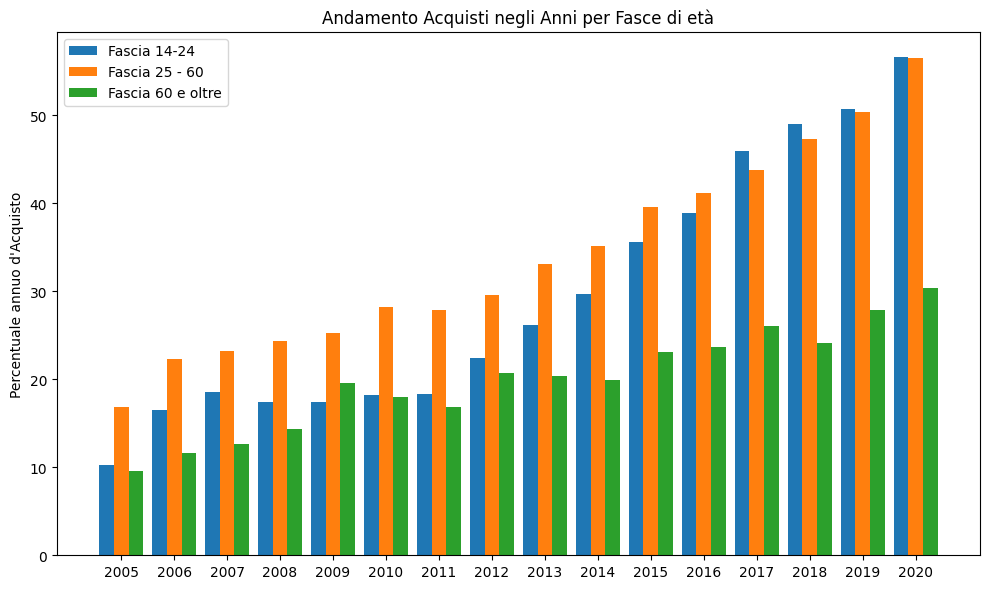

In [8]:
plt.rc('figure', figsize=(10, 6.0))
labels = anni
giovani = dataframe_primafascia["Value"]
media = dataframe_secondafascia["Value"]
anziani = dataframe_terzafascia["Value"]

x = np.arange(len(labels))  # the label locations
width = 0.28  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, giovani, width, label='Fascia 14-24', color = "tab:blue")
rects2 = ax.bar(x , media, width, label='Fascia 25 - 60', color = "tab:orange")
rects3 = ax.bar(x + width, anziani, width, label='Fascia 60 e oltre', color = "tab:green")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Percentuale annuo d'Acquisto")
ax.set_title('Andamento Acquisti negli Anni per Fasce di età')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()